# CH06_数据加载、存储与文件格式

### 6.1 读写文本格式的数据

其中read_csv和read_table可能会是你今后用得最多的
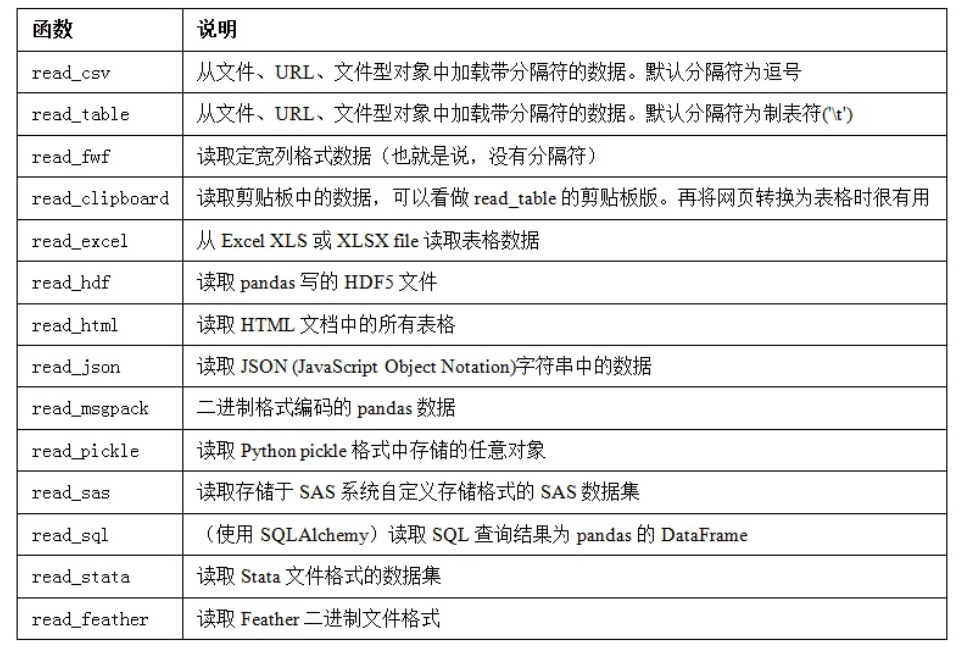

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
!cat examples/ex1.csv


a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [3]:
df=pd.read_csv("examples/ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
pd.read_table("examples/ex1.csv",sep=",")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
!cat examples/ex2.csv 

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [8]:
pd.read_csv('examples/ex2.csv')

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [10]:
pd.read_csv('examples/ex2.csv',header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
pd.read_csv('examples/ex2.csv',names=['a','b','c','d'])

,a,b,c,d
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [12]:
!cat examples/csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [15]:
pd.read_csv('examples/csv_mindex.csv',index_col=['key1','key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [16]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [18]:
#可以用正则化表达式来分割
pd.read_table('examples/ex3.txt',sep='\s+' )

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [19]:
!cat examples/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [21]:
#你可以用skiprows跳过文件的第一行、第三行和第四行：
pd.read_csv('examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [23]:
!cat examples/ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

In [25]:
#缺失值的处理
result = pd.read_csv('examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [26]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


na_values可以用一个列表或集合的字符串表示缺失值


In [35]:
result = pd.read_csv('examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [32]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


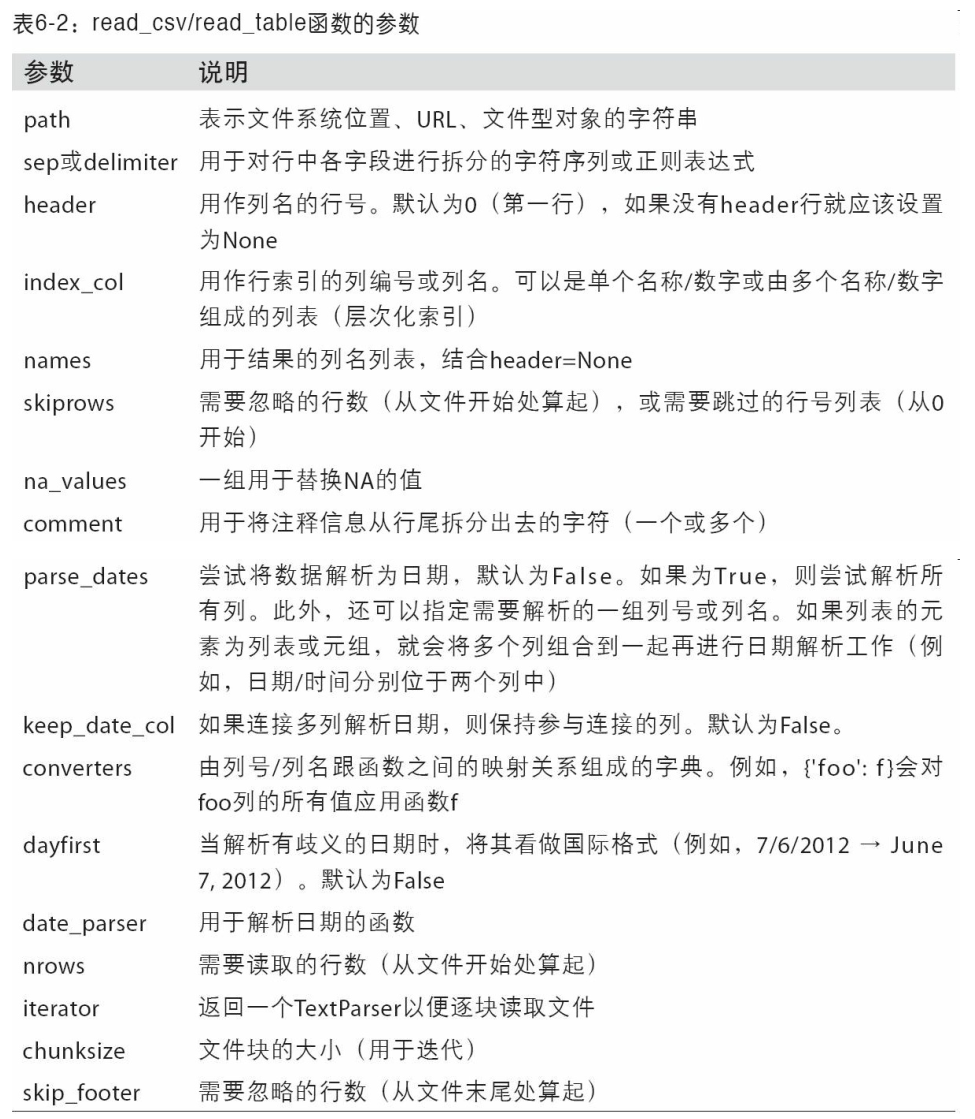

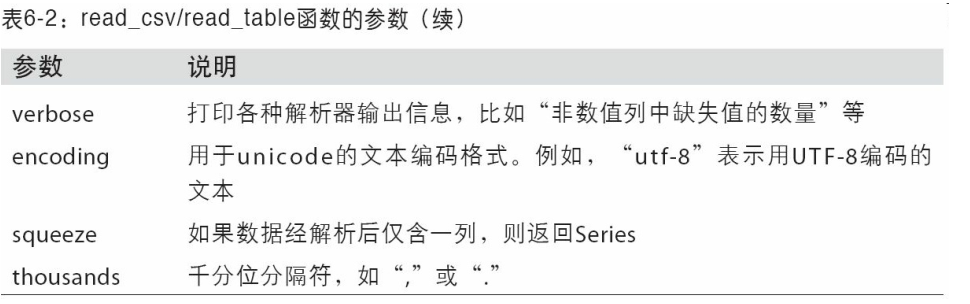

In [37]:
#我们先设置pandas显示地更紧些
pd.options.display.max_rows=10

In [38]:
result = pd.read_csv('examples/ex6.csv')
result


,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [39]:
#大文件如果只想读取几行
pd.read_csv('examples/ex6.csv', nrows=8)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K


In [42]:
#读取一块文件设置chunksize,一次读取一个chunker
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)
chunker

In [72]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

tot = pd.Series([])
count = 0
#按照key进行聚合
for piece in chunker:
#     count+=1
#     print(count)
#     print(piece)
#     print(piece['key'].value_counts())
#     print(piece['key'])
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
    

tot = tot.sort_values(ascending=False)

In [44]:
tot[:]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 36, dtype: float64

* 将数据写出到文本格式

In [73]:
data = pd.read_csv('examples/ex5.csv')

In [74]:
data.to_csv('out.csv')

由于这里直接写出到sys.stdout，所以仅仅是打印
出文本结果而已

In [77]:
import sys
data.to_csv(sys.stdout, sep='#')

#something#a#b#c#d#message
0#one#1#2#3.0#4#
1#two#5#6##8#world
2#three#9#10#11.0#12#foo


In [80]:
#空值用特殊的值来表示
data.to_csv(sys.stdout, sep=' ',na_rep='aaa')

 something a b c d message
0 one 1 2 3.0 4 aaa
1 two 5 6 aaa 8 world
2 three 9 10 11.0 12 foo


In [81]:
#输出指定的数据
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [90]:
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv('examples/tseries.csv')
!cat examples/tseries.csv

2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


* 处理分隔符格式

In [88]:
!cat examples/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [89]:
pd.read_csv('examples/ex7.csv')

,a,b,c
0,1,2,3
1,1,2,3


In [93]:
import csv
f = open('examples/ex7.csv')

reader = csv.reader(f)
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [95]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))
header, values = lines[0], lines[1:]
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

* JSON数据

In [96]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [97]:
obj

'\n{"name": "Wes",\n "places_lived": ["United States", "Spain", "Germany"],\n "pet": null,\n "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},\n              {"name": "Katie", "age": 38,\n               "pets": ["Sixes", "Stache", "Cisco"]}]\n}\n'

In [98]:
import json
result=json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [100]:
#load是json转为python对象 dumps是python转换为json对象
asison=json.dumps(result)
asison

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

In [101]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [102]:
!cat examples/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [104]:
#不能有嵌套的格式
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [105]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


* XML和HTML：Web信息收集

In [106]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')
len(tables)
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [107]:
#按年统计倒闭的银行数
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

### 6.2 二进制数据格式

In [111]:
frame = pd.read_csv('examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
